Data succesfully loaded!


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1421 - loss: 38.2481 - val_accuracy: 0.1571 - val_loss: 3.5253
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1444 - loss: 6.8155 - val_accuracy: 0.1100 - val_loss: 3.5206
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1328 - loss: 4.3815 - val_accuracy: 0.1047 - val_loss: 3.5191
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1161 - loss: 3.9612 - val_accuracy: 0.1047 - val_loss: 3.5105
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1170 - loss: 3.7612 - val_accuracy: 0.1084 - val_loss: 3.5041
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1194 - loss: 3.6480 - val_accuracy: 0.1224 - val_loss: 3.4689
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1227 - loss: 3.5756 - val_accuracy: 0.1204 - val_loss: 3.4668
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1224 - loss: 3.5482 -

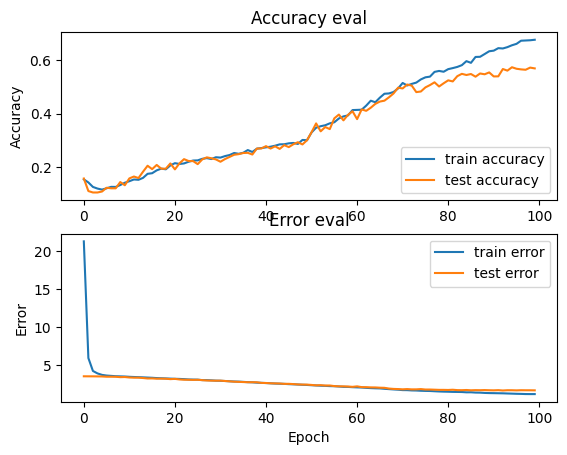

In [14]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras # type: ignore
import matplotlib.pyplot as plt

# path to json file that stores MFCCs and genre labels for each processed segment
DATA_PATH = "data_10.json"


def load_data(data_path):
    """Loads training dataset from json file.

    :param data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data successfully loaded!")

    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

    :param history: Training history of model
    :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


if __name__ == "__main__":

    # load data
    X, y = load_data(DATA_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # build network topology
    # model = keras.Sequential(
    #     [
    #         # input layer
    #         keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    #         # 1st dense layer
    #         keras.layers.Dense(
    #             512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)
    #         ),
    #         keras.layers.Dropout(0.3),
    #         # 2nd dense layer
    #         keras.layers.Dense(
    #             256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)
    #         ),
    #         keras.layers.Dropout(0.3),
    #         # 3rd dense layer
    #         keras.layers.Dense(
    #             64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)
    #         ),
    #         keras.layers.Dropout(0.3),
    #         # output layer
    #         keras.layers.Dense(10, activation="softmax"),
    #     ]
    # )

    model = keras.Sequential(
        [
            # input layer
            keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
            # 1st hidden layer
            keras.layers.Dense(512, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
            keras.layers.Dropout(0.3),
            # 2nd hidden layer
            keras.layers.Dense(256, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
            keras.layers.Dropout(0.3),
            # 3rd hidden layer
            keras.layers.Dense(64, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
            keras.layers.Dropout(0.3),
            # output layer
            keras.layers.Dense(10, activation="softmax"),
        ]
    )

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(
        optimizer=optimiser,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    model.summary()

    # train model
    history = model.fit(
        X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100
    )

    # plot accuracy and error as a function of the epochs
    plot_history(history)